<a href="https://colab.research.google.com/github/ShailySrivastava/README/blob/main/Task_10_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data_set 2 - Copy.csv')

In [ ]:
df.head(), df.columns.tolist()

(   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
 0  Female   34                Yes             1              2           5   
 1  Female   23                Yes             4              3           2   
 2    Male   30                Yes             3              6           4   
 3    Male   22                Yes             2              1           3   
 4  Female   24                 No             2              1           3   
 
    Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
 0                 3               7    6     4  ...          1-3 years   
 1                 1               5    6     7  ...  More than 5 years   
 2                 2               5    1     7  ...          3-5 years   
 3                 7               6    4     5  ...   Less than 1 year   
 4                 6               4    5     7  ...   Less than 1 year   
 
   Invest_Monitor   Expect       Avenue What are your savings objectives

In [ ]:
relevant_columns = [
    'age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
    'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet',
    'Duration', 'Expect'
]

In [ ]:
filtered_data = df[relevant_columns]

In [ ]:
duration_mapping = {
    'Less than 1 year': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    'More than 5 years': 6
}

In [ ]:
expect_mapping = {
    'Less than 10%': 5,
    '10%-20%': 15,
    '20%-30%': 25,
    'More than 30%': 35
}

In [ ]:
filtered_data['Duration'] = filtered_data['Duration'].map(duration_mapping)
filtered_data['Expect'] = filtered_data['Expect'].map(expect_mapping)

<ipython-input-8-d5b4bddd63ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Duration'] = filtered_data['Duration'].map(duration_mapping)
<ipython-input-8-d5b4bddd63ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Expect'] = filtered_data['Expect'].map(expect_mapping)


In [ ]:
filtered_data.dropna(inplace=True)

<ipython-input-9-d4050551feac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


In [ ]:
print(filtered_data.columns)

Index(['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
       'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet',
       'Duration', 'Expect'],
      dtype='object')


In [ ]:
filtered_data.replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-18-a1a19744d9ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.replace({'Yes': 1, 'No': 0}, inplace=True)


In [ ]:
correlation_matrix = filtered_data.corr()

In [ ]:
correlation_matrix


,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Stock_Marktet,Duration,Expect
age,1.000000,0.067415,0.325114,0.340081,-0.030667,-0.108674,-0.302335,-0.316678,0.419660,0.050650,0.025825
Mutual_Funds,0.067415,1.000000,0.243661,-0.385441,-0.411650,0.142987,-0.193279,0.171923,-0.132514,0.391939,-0.435077
Equity_Market,0.325114,0.243661,1.000000,0.016756,-0.310939,-0.200009,-0.442210,0.159186,0.211309,0.537490,0.025280
Debentures,0.340081,-0.385441,0.016756,1.000000,0.469513,-0.494933,-0.559405,-0.259153,0.724472,-0.060056,0.602427
Government_Bonds,-0.030667,-0.411650,-0.310939,0.469513,1.000000,-0.515920,-0.233655,-0.203686,0.339121,-0.318595,0.197917
Fixed_Deposits,-0.108674,0.142987,-0.200009,-0.494933,-0.515920,1.000000,0.112299,-0.346344,-0.317620,-0.173918,-0.515920
PPF,-0.302335,-0.193279,-0.442210,-0.559405,-0.233655,0.112299,1.000000,0.094197,-0.632110,-0.211937,-0.111597
Gold,-0.316678,0.171923,0.159186,-0.259153,-0.203686,-0.346344,0.094197,1.000000,-0.246047,0.293608,0.182972
Stock_Marktet,0.419660,-0.132514,0.211309,0.724472,0.339121,-0.317620,-0.632110,-0.246047,1.000000,0.076074,0.210805
Duration,0.050650,0.391939,0.537490,-0.060056,-0.318595,-0.173918,-0.211937,0.293608,0.076074,1.000000,0.178840


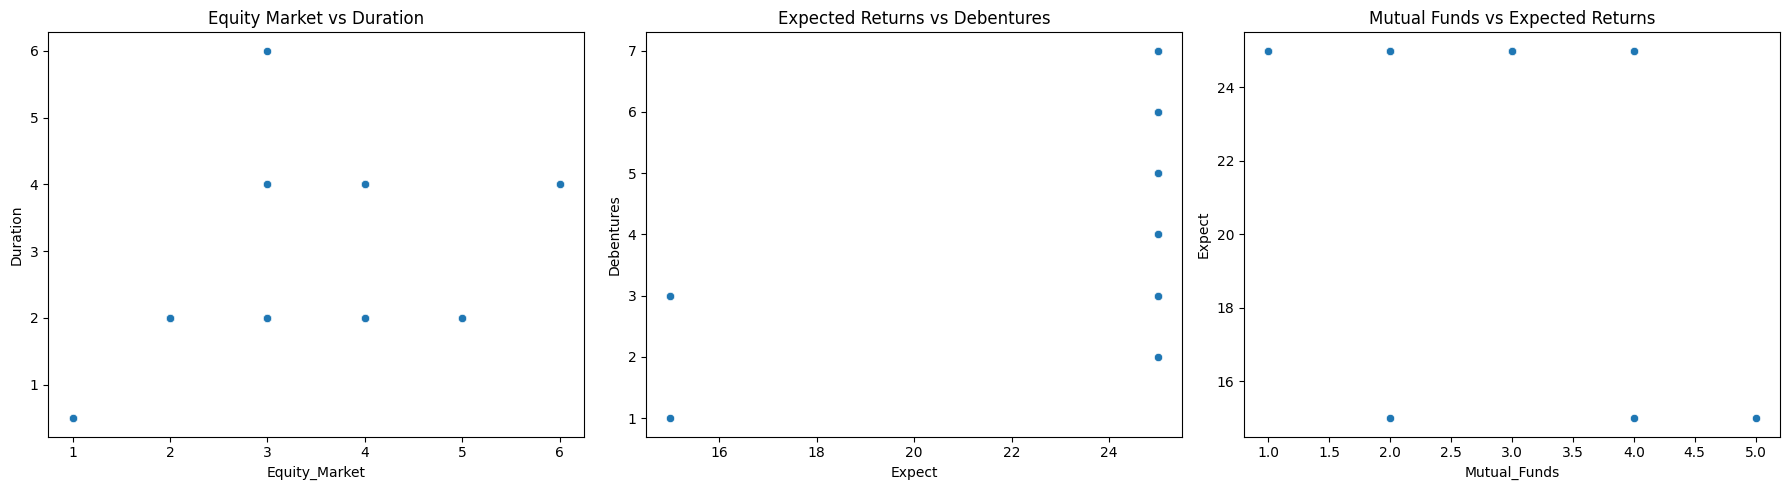

In [ ]:
# Set the size of the plots
plt.figure(figsize=(18, 5))

# Scatter plot for Equity_Market and Duration
plt.subplot(1, 3, 1)
sns.scatterplot(x='Equity_Market', y='Duration', data=filtered_data)
plt.title('Equity Market vs Duration')

# Scatter plot for Expect and Debentures
plt.subplot(1, 3, 2)
sns.scatterplot(x='Expect', y='Debentures', data=filtered_data)
plt.title('Expected Returns vs Debentures')

# Scatter plot for Mutual_Funds and Expect
plt.subplot(1, 3, 3)
sns.scatterplot(x='Mutual_Funds', y='Expect', data=filtered_data)
plt.title('Mutual Funds vs Expected Returns')

# Display the plots
plt.tight_layout()
plt.show()
